# Sheet 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
(a)

In [2]:
def biweight(x, mu, w):
    """biweight kernel at mean mu, with bandwidth w evaluated at x"""
    return 15. * (1. - ((x - mu)/w)**2)**2 / (16. * w)
    #TODO: implement the quartic (biweight) kernel


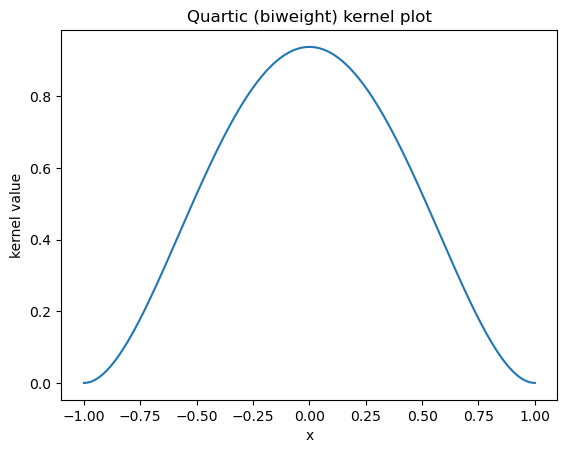

In [ ]:
# TODO plot the kernel
x = np.linspace(-1, 1, 1000)
y = [biweight(t, mu=0, w=1) for t in x]
fig, ax = plt.subplots()
ax.set_xlabel("x")
ax.set_ylabel("kernel value")
ax.set_title("Quartic (biweight) kernel plot")
ax.plot(x, y)
plt.show()

(b)

data.shape=(10000,), data50.shape=(50,)


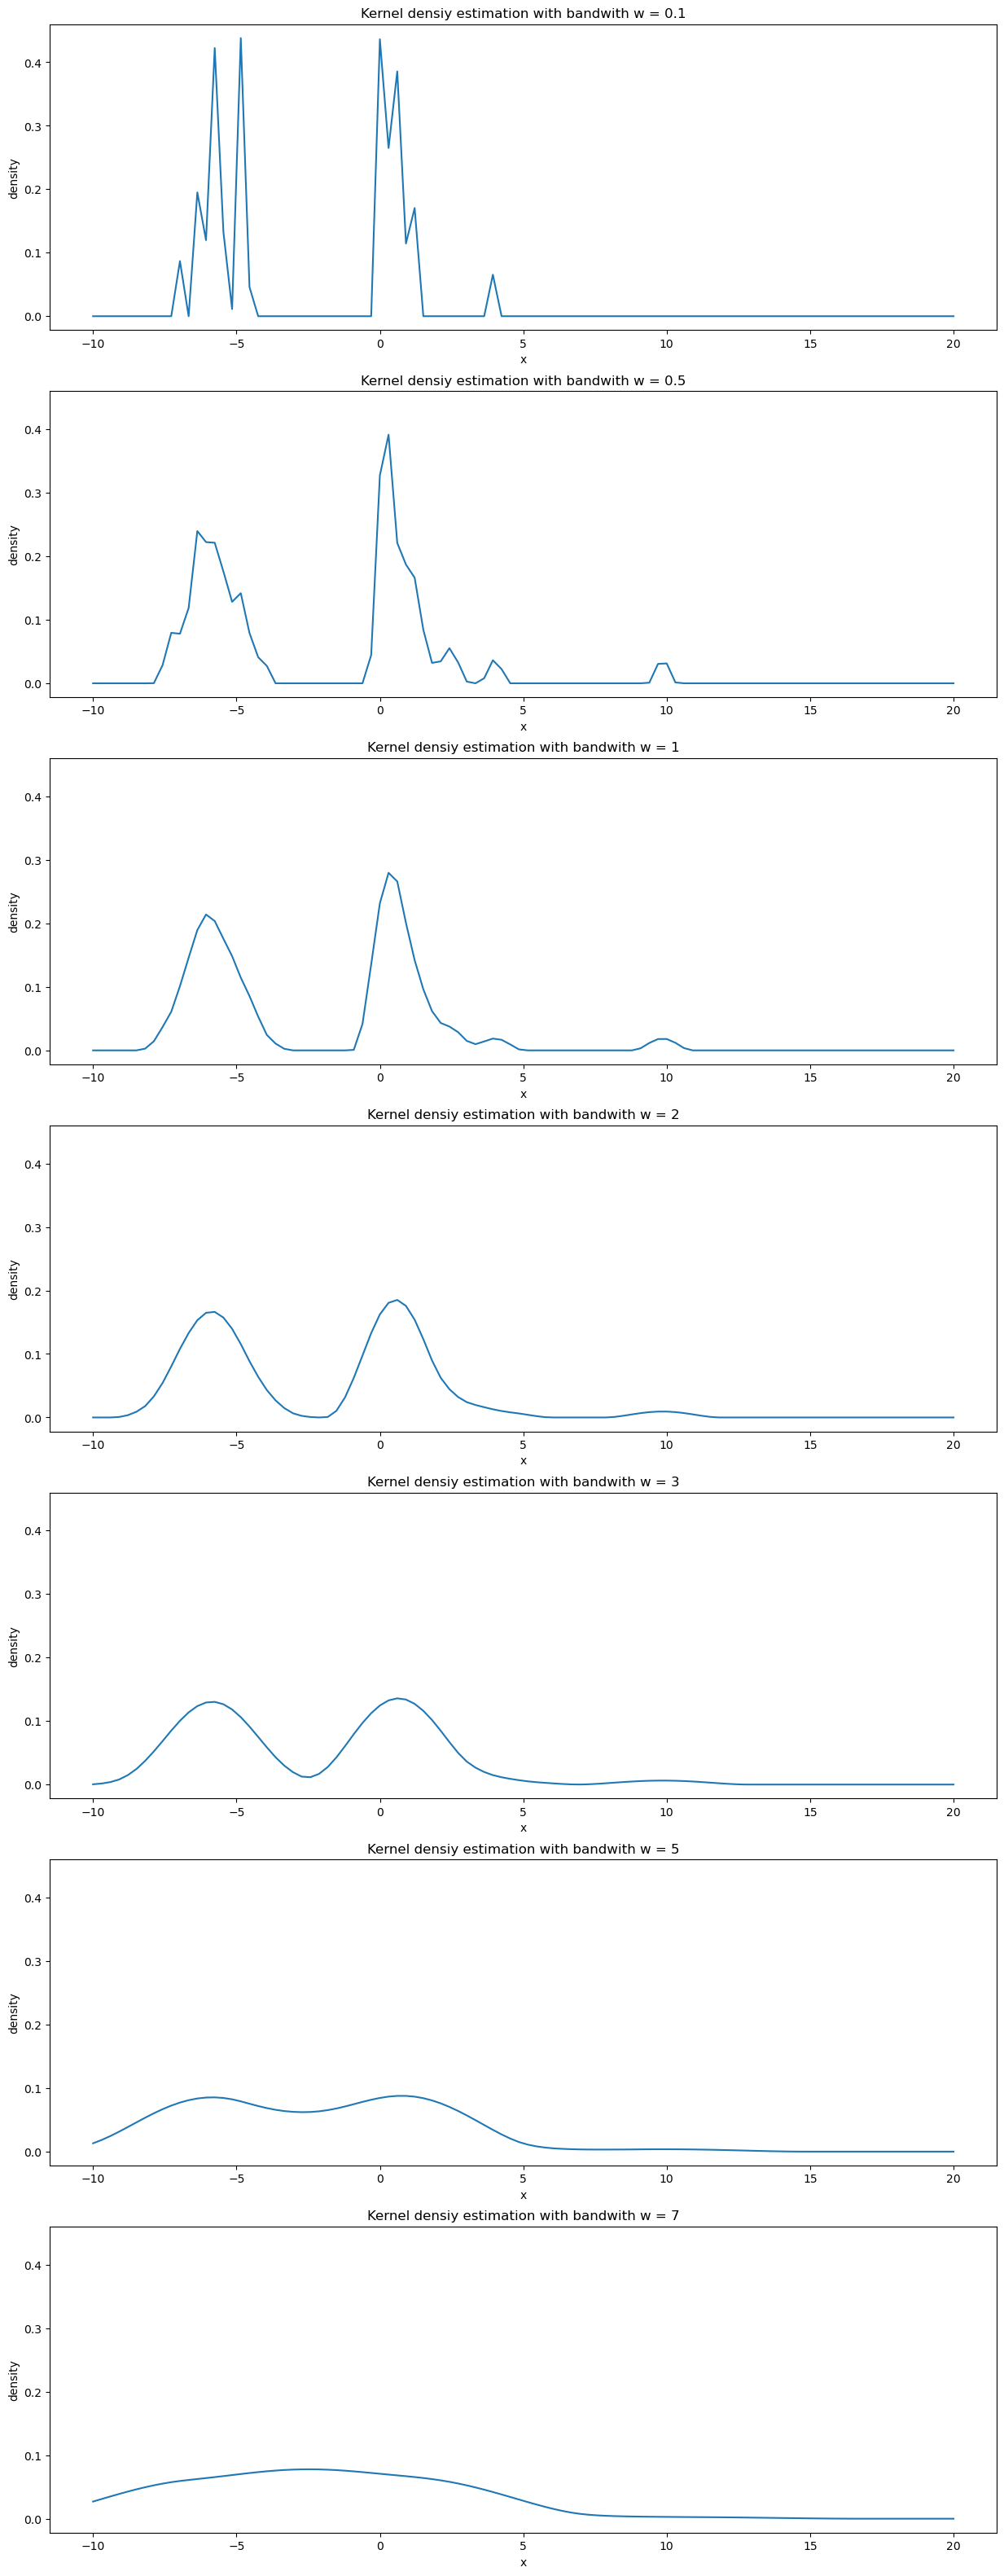

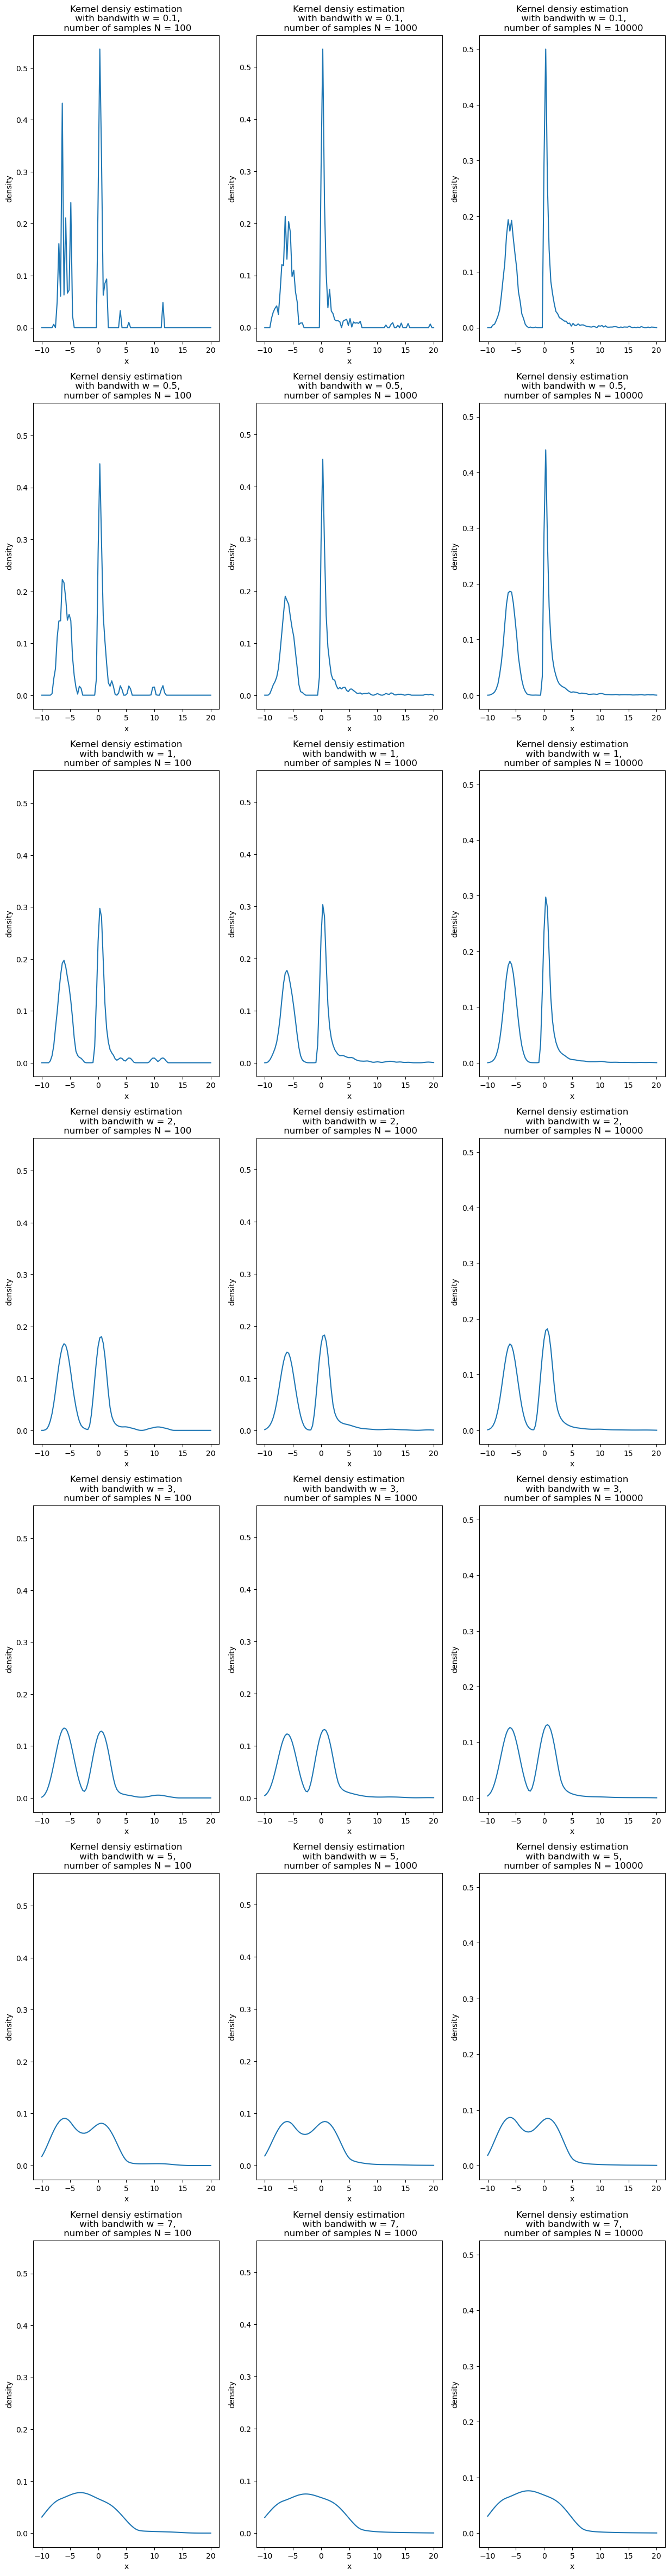

In [ ]:
# load the data
data = np.load("data/samples.npy")
data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')

ws = [0.1, 0.5, 1, 2, 3, 5, 7]

fig, ax = plt.subplots(len(ws), 1, sharey='col')

for i, w in zip(range(len(ws)), ws):
    x = np.linspace(-10, 20, 100)
    y = [sum([biweight(graph_x, data_x, w) for data_x in data50 if abs(graph_x - data_x) <= w] ) / data50.shape[0] for graph_x in x ]
    ax[i].plot(x, y)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('density')
    ax[i].set_title(f'Kernel densiy estimation with bandwith w = {w}')

fig.set_figwidth(15)
fig.set_figheight(40)
plt.show()

data_len = [100, 1000, 10000]

fig, ax = plt.subplots(len(ws), len(data_len), sharey='col')

for i, w in enumerate(ws):
    for j, N in enumerate(data_len):
        x = np.linspace(-10, 20, 100)
        data_curr = data[:N]
        y = [sum([biweight(graph_x, data_x, w) for data_x in data_curr if abs(graph_x - data_x) <= w] ) / N  for graph_x in x ]
        ax[i, j].plot(x, y)
        ax[i, j].set_xlabel('x')
        ax[i, j].set_ylabel('density')
        ax[i, j].set_title(f'Kernel densiy estimation\n with bandwith w = {w},\n number of samples N = {N}')

fig.set_figwidth(15)
fig.set_figheight(60)
plt.show()



In [7]:
def kde(x, obs, w=1):
    # TODO: implement the KDE with the biweight kernel

In [ ]:
# TODO: compute and plot the kde on the first 50 data points

# TODO: explore what happens when you increase the number of points

## 3 Mean-Shift
(b)

In [9]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: start by computing a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    
    return local_means
    

In [ ]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1


# TODO: plot the trajectories


In [ ]:
# TODO: repeat the above for "blurring" mean shift